# Deep learning enables robust assessment and selection of human blastocysts after in vitro fertilization

## Abst

Visual morphology assessment is routinely used for evaluating of embryo quality and selecting human blastocysts for transfer after in vitro fertilization (IVF). However, the assessment produces different results between embryologists and as a result, the success rate of IVF remains low. To overcome uncertainties in embryo quality, multiple embryos are often implanted resulting in undesired multiple pregnancies and complications. Unlike in other imaging fields, human embryology and IVF have not yet leveraged artificial intelligence (AI) for unbiased, automated embryo assessment. We postulated that an AI approach trained on thousands of embryos can reliably predict embryo quality without human intervention. We implemented an AI approach based on deep neural networks (DNNs) to select highest quality embryos using a large collection of human embryo time-lapse images (about 50,000 images) from a high-volume fertility center in the United States. We developed a framework (STORK) based on Google’s Inception model. STORK predicts blastocyst quality with an AUC of >0.98 and generalizes well to images from other clinics outside the US and outperforms individual embryologists. Using clinical data for 2182 embryos, we created a decision tree to integrate embryo quality and patient age to identify scenarios associated with pregnancy likelihood. <span style="color : red; ">Our analysis shows that the chance of pregnancy based on individual embryos varies from 13.8% (age ≥41 and poor-quality) to 66.3% (age <37 and good-quality) depending on automated blastocyst quality assessment and patient age.</span>
In conclusion, our AI-driven approach provides a reproducible way to assess embryo quality and uncovers new, potentially personalized strategies to select embryos.

視覚的形態学的評価は、胚の質を評価し、体外受精（体外受精）後の移植のためにヒト胚盤胞を選択するために日常的に使用されています。
しかし、この評価は胚培養士によって結果が異なり、その結果、体外受精の成功率は低いままです。
胚の質の不確実性を克服するために、複数の胚がしばしば移植され、望ましくない多胎妊娠や合併症を引き起こします。他のイメージング分野とは異なり、ヒト胚学と体外受精では、偏りのない自動胚評価が必要とされる為、人工知能（AI）はまだ活用されていません。
我々は、何千もの胚で訓練された人工知能（AI）のアプローチが、人間の介入なしに胚の品質を確実に予測できると仮定した。私たちは、米国の大規模不妊治療センターのヒト胚のタイムラプス画像（約5万枚）の大規模コレクションを用いて、最高品質の胚を選択するために、ディープニューラルネットワーク（DNN）に基づいたAIアプローチを実装しました。
GoogleのInceptionモデルに基づいたフレームワーク（STORK）を開発しました。
STORKは、AUCが0.98以上で胚盤胞の品質を予測し、米国外の他のクリニックからの画像にもよく一般化し、個々の胚培養士よりも優れています。
2182個の胚の臨床データを用いて、胚の質と患者の年齢を統合した決定木を作成し、妊娠の可能性に関連するシナリオを特定しました。
<span style="color : red; ">我々の分析によると、個々の胚に基づく妊娠の可能性は、自動胚盤胞品質評価と患者の年齢によって、13.8％（年齢≧41歳で品質が悪い）から66.3％（年齢＜37歳で品質が良い）まで異なることが示されています。</span>
結論として、私たちのAI主導のアプローチは、胚の品質を評価するための再現性のある方法を提供し、胚を選択するための新しい、パーソナライズされた可能性のある戦略を発見します。

## INTRO

Infertility remains an unremitting reproductive issue that affects about 186 million people worldwide.[1]
In the United States, infertility affects ~8% of women of child-bearing age.**<span style="color : blue; ">[2]</span>**
In vitro fertilization (IVF) is one of the most common treatments for infertility. IVF involves ovarian stimulation followed by the retrieval of multiple oocytes, fertilization, and embryo culture for 1–6 days in controlled environmental conditions. 
Although IVF and embryo-transfer technologies have improved considerably over the past 30 years, the efficacy of IVF remains relatively low.[3]

不妊症は、世界で約1億8,600万人に影響を与えている生殖に関する問題であることに変わりはありません。
米国では、不妊症は妊娠可能な年齢の女性の約8％に影響を与えています。
体外受精（IVF）は、不妊症の最も一般的な治療法の一つです。体外受精では、卵巣を刺激した後、複数の卵子を採取し、受精させ、制御された環境条件下で1～6日間胚を培養します。
体外受精と胚移植の技術は過去30年間でかなり向上してきたが、体外受精の有効性は比較的低いままである。



Conventional embryo evaluation involves manual grading of human embryos at the blastocyst stage (embryo on day 5) based on morphological analysis by skilled embryologists.[4] While this selection method is used universally in clinical practice, the evaluation of an embryo based on a static image represents a crude, subjective evaluation of embryo quality, which is incom-plete as well as time consuming.[5-7]

従来の胚評価では、熟練した胚培養士による形態学的分析に基づいて、胚盤胞期（5日目の胚）のヒト胚を手動で等級付けすることが行われています。この選択方法は臨床で普遍的に使用されていますが、静止画像に基づく胚の評価は、胚の質の粗雑で主観的な評価であり、時間がかかるだけでなく、不完全なものです。



Moreover, there continues to be a tendency for inconsistent blastocyst classification, often associated with different grading systems among medical centers.
Indeed, attempts to establish a universal grading and selection system have thus far failed to catch on.**<span style="color : blue; ">[8]</span>**

さらに、胚盤胞の分類には一貫性がない傾向が続いており、これは医療センター間での異なる等級分けシステムに関連していることが多い。
実際、普遍的な等級付けおよび選択システムを確立しようとする試みは、これまでのところ成功していない。



Improving the ability to select the single best embryo with the highest implantation potential would increase pregnancy rates as well as minimize the chance of multiple pregnancies due to the transfer of multiple embryos.[9]Time-lapse imaging (TLI)**<span style="color : blue; ">[10]</span>** is an emerging technology that allows continuous observation of embryo development without removing embryos from controlled and stable incubator conditions.
However, even though TLI represents a step toward more objective embryo evaluation, the inter- and intra-evaluator variation among embryologists using conventional morphological grading and/or TLI annotations is well documented.[12-14]

着床可能性の高い単一の最良の胚を選択する能力を向上させることは、妊娠率を高めるだけでなく、複数の胚を移植することによる多胎妊娠の可能性を最小限に抑えることにもつながる。タイムラプスイメージング（TLI）は、制御された安定したインキュベーター条件から胚を削除することなく、胚の発生を継続的に観察することができる新しい技術です。しかし、TLIは、より客観的な胚評価への一歩を表しているにもかかわらず、従来の形態学的等級付けやTLIアノテーションを用いた胚学者の間での評価者間および評価者内でのばらつきは、たびたび文書化されています。



There are various efficient machine learning methods, which due to their relatively better performances in various fields of research are utilized for embryo classification. Two recent studies have attempted to use some of these approaches for embryo quality analysis, with varying degrees of success[15], [16]　on a limited bovine and mammalian oocytes data, using AI- and random forest (RF)-based classification, respectively. Their results showed 76.4% (test set = 73 embryos) and 75%(test set = 56 embryos) accuracy for discretization of bovine embryo grades and mammalian oocyte grades, respectively.

<span style="color : red; ">Further- more, a few previously published approaches have focused on classifying human blastocyst quality based on specific features, such as the inner cell mass (ICM) area, trophectoderm (TE) area, zona pellucida (ZP) thickness, and blastocyst area and radius separately.[9], **<span style="color : blue; ">[17]</span>** In particular, Filho et al. presented a semi-automatic grading system of human embryos. The authors showed that classifiers can have different accuracies for each embryo component (blastocyst extension, ICM, and TE). Their results indicated various accuracy ranges from 67 to 92% for the embryo extension, from 67 to 82% for the ICM, and from 53 to 92% for TE detection; 92% was the highest accuracy achieved across a 73-embryo test set.</span> Although these methods achieved reasonable accuracy in assessing human embryo quality, they require advanced embryological expertize and several prepro- cessing steps, and do not scale to large datasets.

様々な効率的な機械学習法がありますが、それらは様々な研究分野で比較的優れた性能を発揮するため、胚の分類に利用されています。最近の2つの研究では、これらのアプローチのいくつかを胚の品質分析に使用することを試みましたが、限られたウシと哺乳類の卵母細胞のデータを用いて、それぞれAIとランダムフォレスト(RF)ベースの分類を使用して、程度の差はあれ成功しました。その結果、ウシ胚の等級と哺乳類卵母細胞の等級の離散化の精度は、それぞれ76.4％（テストセット=73胚）と75％（テストセット=56胚）を示した。

<span style="color : red; ">さらに、これまでに発表されたいくつかのアプローチでは、ヒトの胚盤胞の品質を特定の特徴に基づいて分類することに焦点を当てています。例えば、内側の細胞塊（ICM）の面積、トロフィークトーダー（TE）の面積、ペルシダ帯（ZP）の厚さ、および胚盤胞の面積と半径を別々に分類しています。特に、Filhoら(17)は、ヒト胚の半自動等級付けシステムを発表した。著者らは、胚の構成要素（胚盤胞伸展、ICM、TE）ごとに分類器の精度が異なることを示した。その結果、胚延長では67～92％、ICMでは67～82％、TE検出では53～92％と様々な精度範囲を示し、73個の胚の試験セットで達成された最高精度は92％でした(17)。</span>これらの手法はヒト胚の品質評価において妥当な精度を達成していますが、高度な胚学的専門知識といくつかの前処理ステップを必要とし、大規模なデータセットには対応していません。


#### 《補足》

**胚盤胞について**

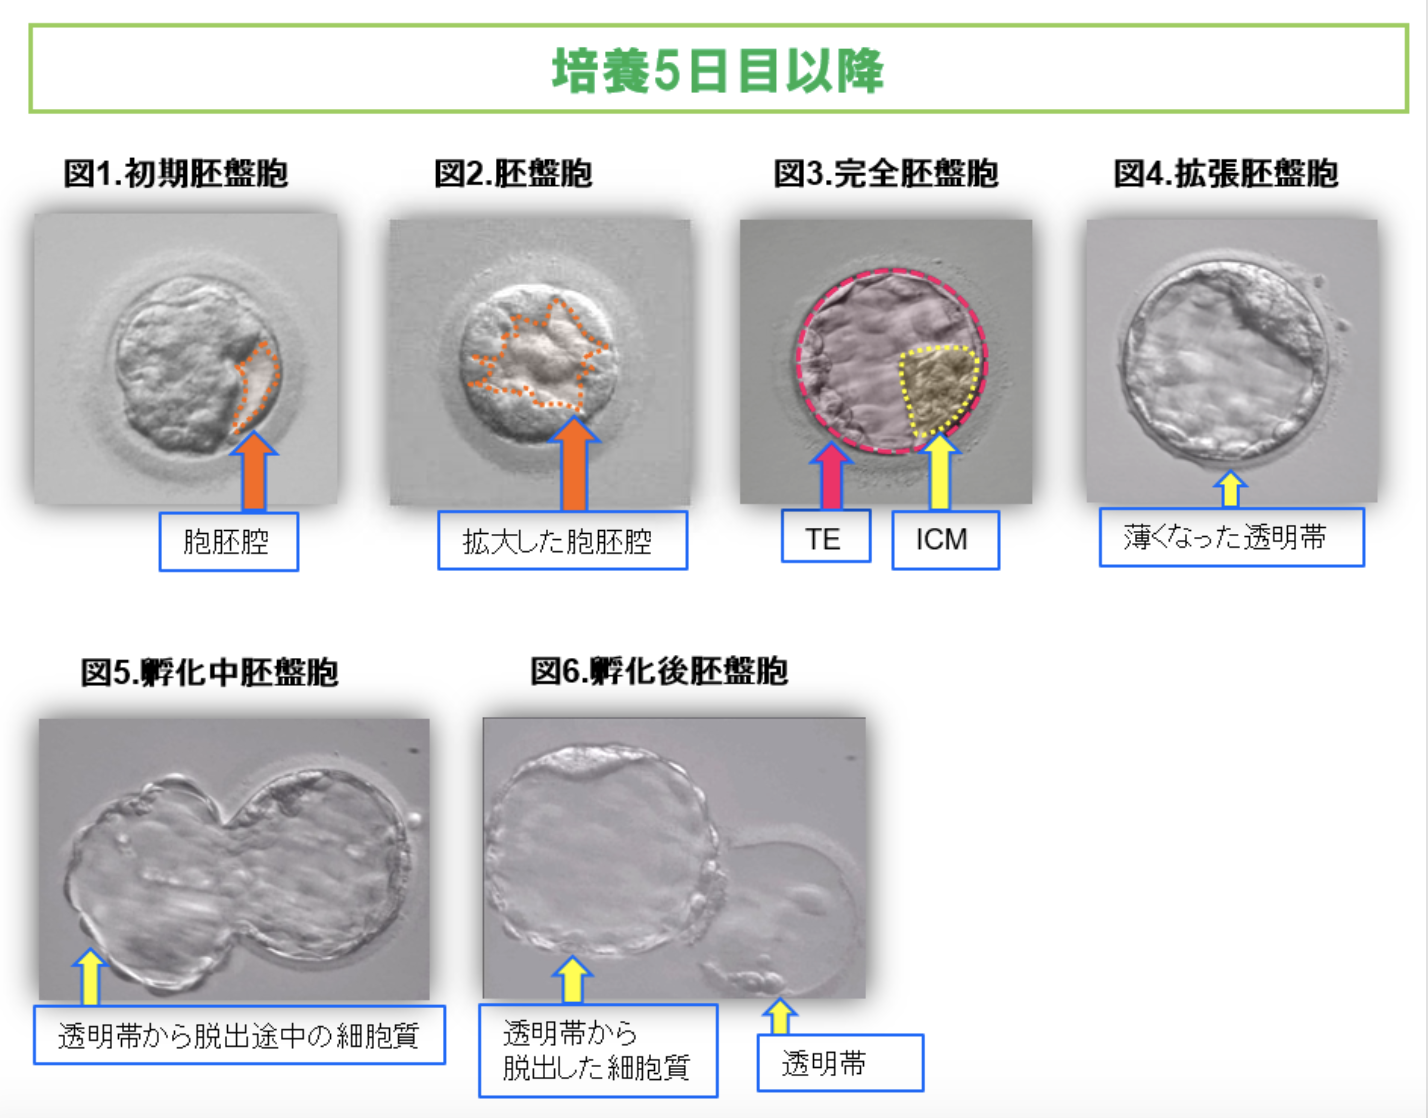

---

Deep learning algorithms, in particular convolutional neural networks (CNNs), have recently been used to address a number of medical-imaging problems, such as detection of diabetic retinopathy,[18] skin lesions,[19] and diagnosing disease. [20] They have become the technique of choice in computer vision and they are the most successful type of models for image analysis. Unlike regular neural networks, CNNs contain neurons arranged in three dimensions (i.e., width, height, depth). Recently, deep architectures of CNNs such as Inception21 and ResNet22 have dramatically increased the progress rate of deep learning methods in image classification. <span style="color : red; ">In this paper, we sought to use deep learning to accurately predict the quality of human blastocysts and help select the best single embryo for transfer(Fig. 1).</span>

ディープラーニングアルゴリズム、特に畳み込みニューラルネットワーク（CNN）は、最近では、糖尿病網膜症の検出(18)、皮膚病変の検出(19)疾患の診断など、多くの医療画像の問題に対処するために使用されています(20)。通常のニューラルネットワークとは異なり、CNNは3次元（すなわち、幅、高さ、奥行き）に配置されたニューロンを含んでいる。最近では，Inception(21)やResNet(22)などのCNNの深層アーキテクチャにより，画像分類における深層学習法の進歩率が飛躍的に向上している(23)。<span style="color : red; ">本論文では、ディープラーニングを用いてヒト胚盤胞の品質を正確に予測し、移植に最適な単一胚の選択に役立てることを目指しました(Fig1）。</span>

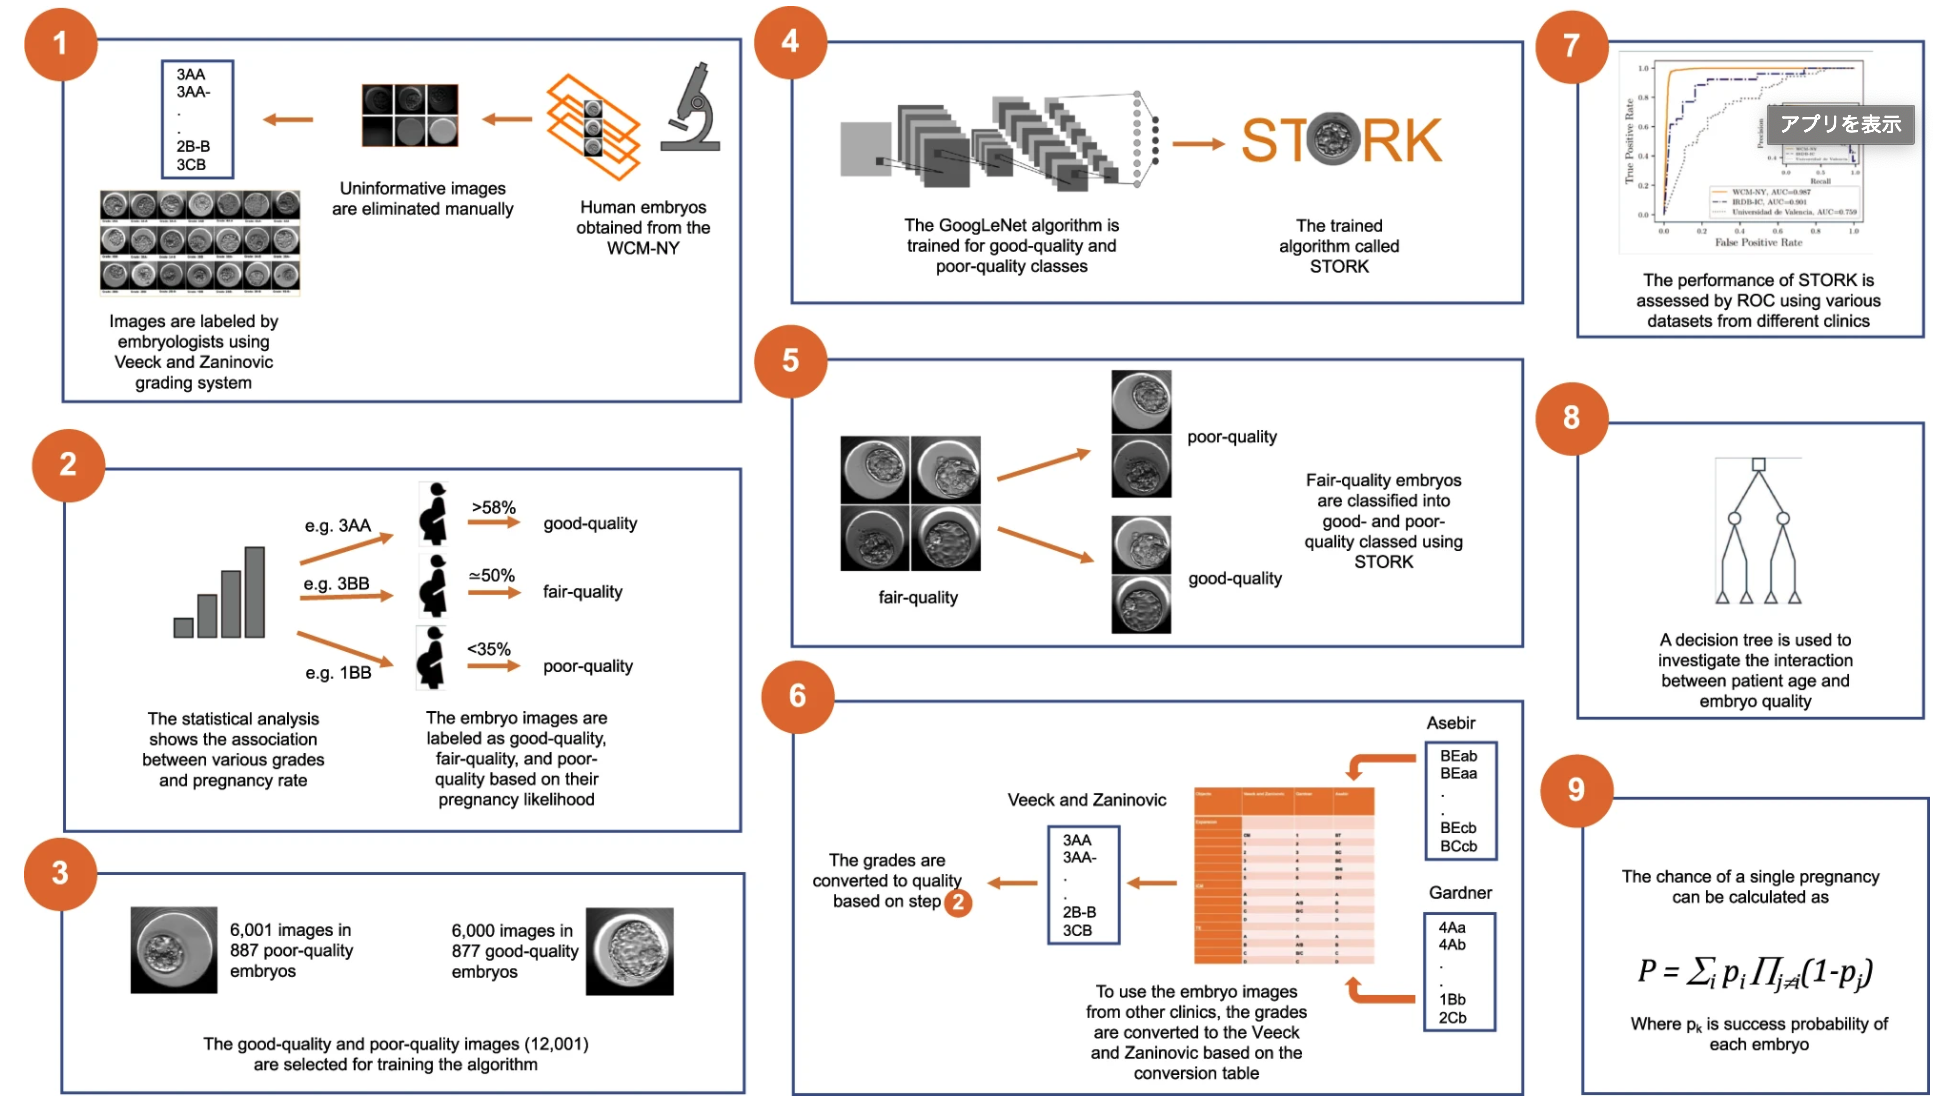

**Fig. 1**

The STORK flowchart: This flowchart illustrates the design and assessment of STORK. First, Human embryo images are provided from the embryology lab and labeled by embryologists as good-quality or poor-quality based on their pregnancy likelihood. Then, the labels and clinical information from the extracted images are integrated, and the Inception-V1 algorithm is trained for good-quality and poor-quality classes. Furthermore, STORK is evaluated by a blind test set to assess its performance in predicting embryo quality. Finally, the CHAID decision tree is used to investigate the interaction between patient age and embryo quality


STORKのフローチャートです。このフローチャートは、STORKのデザインと評価を説明しています。まず、胚培養室からヒト胚の画像が提供され、胚培養士が妊娠の可能性をもとに品質の良いものと悪いものに分類します。そして、抽出された画像のラベルと臨床情報を統合し、Inception-V1アルゴリズムを用いて良品・不良品クラスの学習を行います。さらに、STORKをブラインドテストセットで評価し、胚の品質を予測する性能を評価する。最後に、CHAID決定木を用いて、患者の年齢と胚の質との間の相互作用を調査します。

---

## RESULTS

### Deep neural network achieves a highly accurate classification of embryo images

#### ディープニューラルネットワークが胚画像の高精度な分類を実現

We used time-lapse images from 10,148 human embryos, obtained from the Center for Reproductive Medicine at Weill Cornell Medicine to train and validate our DNN. The 10,148 embryos (WCM-NY dataset) were classified into three major quality groups, good-quality (n = 1345 embryos), fair-quality (n = 4062 embryos), and poor-quality (n = 4741 embryos) (Fig. 2a, b) based on their assigned grades (see Methods). We obtained time-lapse images from each of the embryos, each consisting of several time points, seven focal depths per time point (Fig. 2a, b) and 500 × 500 pixels black and white images per focal depth (+45, +30, +15, 0, −15, −30, and −45). Upon preprocessing and removal of images with readability issues (e.g., those with a dark background) and random selection of a balanced set of images (see Methods), we were left with a total of 12,001 images from up to seven focal depths: 6000 images in 877 good-quality embryos, and 6001 images in 887 poor-quality embryos.

我々は、我々のDNNの訓練と検証のために、ウェイルコーネル大学生殖医学センターから入手した10,148個のヒト胚からのタイムラプス画像を使用しました。10,148個の胚（WCM-NYデータセット）を、品質の良い胚（n = 1345個）、品質が中程度な胚（n = 4062個）、品質の悪い胚（n = 4741個）の3つの主要なグループに分類しました（Fig2a,b）。我々は、それぞれの胚から、複数の時間点、時間点ごとの７つの焦点深度（Fig２a,ｂ）、および焦点深度ごとの５００×５００ピクセルの白黒画像（＋４５、＋３０、＋１５、０、-１５、-３０、および-４５）で構成されるタイムラプス画像を得た。前処理を行い、読みやすさに問題のある画像（例えば、背景が暗い画像）を除去し、バランスのとれた画像セットをランダムに選択した後（方法を参照）、最大７つの焦点深度からの合計12,001枚の画像が得られました：高品質の胚877個の6000枚の画像、および低品質の胚887個の6001枚の画像。

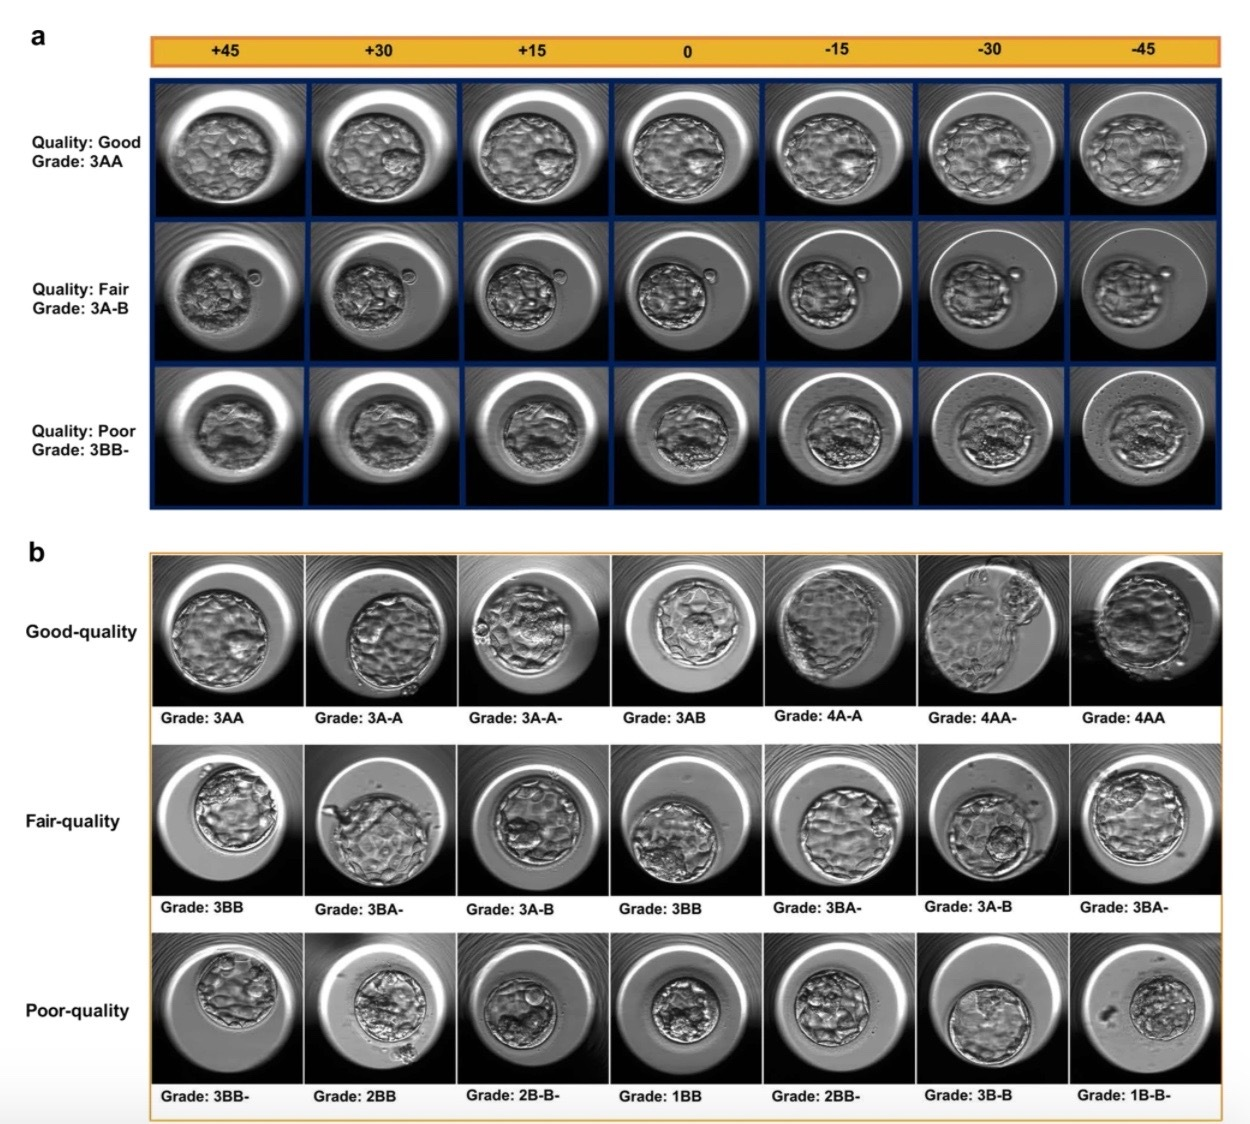

**Fig. 2**

Embryologists’ evaluation: 

**a** This figure shows three examples of Veeck and Zaninovich grades and their corresponding quality labels across seven focal depths. 

**b** Embryologists evaluate embryo quality using an internal scoring system and subsequently classify them into three major groups (good-quality, fair-quality, poor-quality) based on the pregnancy rate

胚培養士の評価： 

**a** この図は、7つの焦点深度におけるVeeckおよびZaninovichグレードとそれに対応する品質ラベルの3つの例を示しています。

**b** 胚培養士は、内部スコアリングシステムを使用して胚の品質を評価し、その後、妊娠率に基づいて3つの主要なグループ（良い品質、公正な品質、貧しい品質）に分類します。


---

We then trained an Inception-V1 DNN–based algorithm using the two quality groups at both ends of the spectrum, i.e., good-quality and poor-quality. The Inception-V1 architecture is a transfer learning algorithm, where we initially performed fine-tuning of the parameters for all of the layers. We used 50,000 steps for training the DNN and subsequently evaluated the performance of our DNN (called STORK) using a randomly selected independent test set with 964 good-quality images from 141 embryos and 966 poor-quality images from 142 embryos. <span style="color : red; ">Our results showed that the trained algorithm was able to identify good-quality and poor-quality images with 96.94% accuracy (1871 correct predictions out of 1930 images).</span>

次に、Inception-V1 DNNベースのアルゴリズムを、品質の良いグループと悪いグループの両端にある2つの品質グループを用いて学習させた。Inception-V1のアーキテクチャは伝達学習アルゴリズムであり、最初にすべてのレイヤーのパラメータの微調整を行いました。DNNの学習には50,000ステップを使用し、その後、141個の胚から964個の良質画像と142個の胚から966個の劣悪画像をランダムに選択した独立したテストセットを使用して、我々のDNN（STORKと呼ばれる）の性能を評価しました。<span style="color : red; ">その結果、訓練されたアルゴリズムは、96.94%の精度で良質な画像と低品質な画像を識別することができました（1930枚の画像のうち1871枚の予測が正しかった）。</span>



To measure the accuracy of STORK for individual embryos, we used a simple voting system across multiple image focal depths. If the majority of images from the same embryo were predicted to be of good-quality, then the final quality of the embryo was considered good. For a small number of cases in which the number of good-quality and poor-quality images was equal (e.g., three good-quality and three poor-quality for six focal depths), we used STORK’s output probability scores to break the tie. <span style="color : red; ">At the embryo level, we obtained 97.53% accuracy with 276 correct predictions out of 283 embryos.</span>

個々の胚に対するSTORKの精度を測定するために、複数の画像の焦点深度にまたがる単純な投票システムを使用しました。同じ胚からの画像の大部分が良品であると予測された場合、胚の最終的な品質は良好であると考えられます。良い品質の画像と悪い品質の画像の数が等しい場合（例えば、6つの焦点深度で良い品質の画像が3枚、悪い品質の画像が3枚）の数が少ない場合、STORKの出力確率スコアを使用して、同点を解消しました。<span style="color : red; ">胚レベルでは、283個の胚のうち276個の予測が正しく、97.53%の精度が得られました。</span>



At the image level, we observed an average area under the curve (AUC) of 0.987 (Fig. 3a) on the blind test set. We also found that training an Inception-V1 model without parameter fine-tuning did not affect performance (accuracy; Fig. 3b). This  observation is in agreement with previous studies using these deep learning techniques.<span style="color : blue; ">**[20], [24], [25]**</span>

画像レベルでは、ブラインドテストセットで平均曲線下面積（AUC）は0.987（Fig3a）であった。また、パラメータの微調整を行わずにInception-V1モデルを学習しても、性能（精度）に影響を与えないことがわかった（Fig3b）。この観察は、これらのディープラーニング技術を用いた先行研究と一致している。

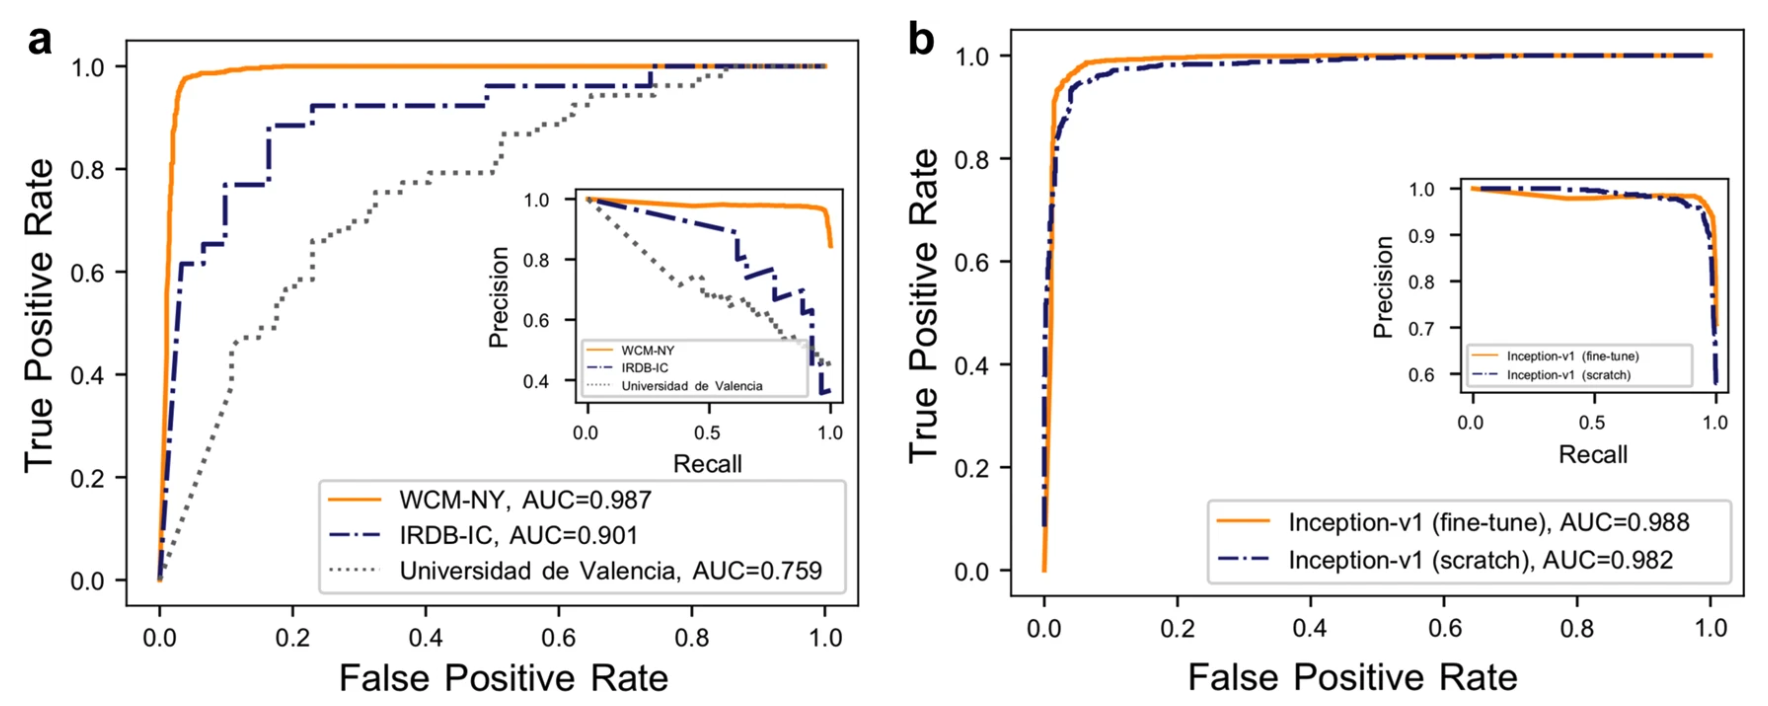

**Fig. 3** 

Deep neural network results: 

**a** Inception-V1 (fine-tuning the parameters for all layers) results for three datasets. 

**b** Inception-V1 via two different training methods (fine-tuning the parameters for all layers and training from scratch) in good-quality and poor-quality embryo quality discrimination dataset. WCM-NY: data from the Center for Reproductive Medicine and Infertility at Weill Cornell Medicine of New York; IRDB-IC: data from the Institute of Reproduction and Developmental Biology of Imperial College; Universidad de Valencia: data from the Institute Valenciano de Infertilidad, Universidad de Valencia


ディープニューラルネットワークの結果: 

a.	3つのデータセットにおけるInception-V1（全層のパラメータを微調整）の結果。

b.	良質と低品質の胚の品質識別データセットにおける2つの異なるトレーニング方法（全層のパラメータを微調整し、ゼロからトレーニング）によるInception-V1。WCM-NY：ニューヨークのWeill Cornell Medicineの生殖医学・不妊センターのデータ、IRDB-IC：インペリアルカレッジ生殖発生生物学研究所のデータ、バレンシア大学：バレンシア大学遺伝学研究所のデータ。

---

We also found that STORK classified the fair-quality embryo (intermediate group, Figs. 2 and 4) images (4480 images from 640 embryos) as 82% good-quality (526 embryos) and 18% poor- quality (114 embryos), respectively. As Inception-V1 was trained for good-quality and poor-quality classes with different pregnancy probabilities (an ~58% and 35% chance of pregnancy for good- quality and poor-quality classes, respectively), we wondered if STORK nonetheless produced relevant predictions (association between embryo quality and pregnancy rate) within the fair- quality class. A closer look showed that embryos with fair-quality images that were classified as poor-quality by STORK had a lower likelihood of positive live birth (50.9%) as compared to those classified as good-quality (61.4% positive live birth; p < 0.05 by the two-tailed Fisher’s test). Note that STORK alone cannot estimate the pregnancy rate. However, it can detect the association between embryo quality and pregnancy rate based on morpho- logical classification.

また、STORKでは、公正品質の胚（中間群、図2、図4）の画像（640個の胚から4480個の画像）を、それぞれ良品（526個）が82％、不良（114個）が18％と分類していることがわかりました。Inception-V1は、妊娠確率の異なる良質クラスと貧弱クラス（良質クラスでは妊娠確率が58%、貧弱クラスでは妊娠確率が35%）で学習したので、STORKが良質クラスでも関連性のある予測（胚の質と妊娠率の関連性）を出しているかどうかを考えてみました。さらに詳しく見ると、STORKで品質が悪いと分類された公正品質の画像を持つ胚は、品質が良いと分類された胚（61.4%の陽性出生；両側検定によるp < 0.05）と比較して、陽性出生の可能性が低いことが示されました（50.9%）。STORKだけでは妊娠率を推定できないことに注意してください。しかし、形態学的分類に基づいて、胚の質と妊娠率との関連を検出することはできます。



In addition, we found that fair-quality embryos predicted to be good-quality by STORK came from younger patients (33.9 years old on average) than those predicted to be poor-quality (34.25 years old on average). Interestingly, these numbers are similar to the age of patients with good-quality and poor-quality embryos: 33.86 and 34.72 years old on average, respectively. This suggests that STORK finds sufficient structure within embryos classified as fair-quality to make clinically relevant predictions (Fig. 4)

さらに、STORKで良品と予測された公正品質の胚は、不良品と予測された胚（平均34.25歳）よりも若い患者（平均33.9歳）からのものであることがわかりました。興味深いことに、これらの数値は、質の良い胚と質の悪い胚の患者の年齢に似ています：平均年齢はそれぞれ33.86歳と34.72歳です。このことから、STORKは、臨床的に適切な予測を行うのに十分な構造を優良胚の中に見出していることがわかります（Fig4）。

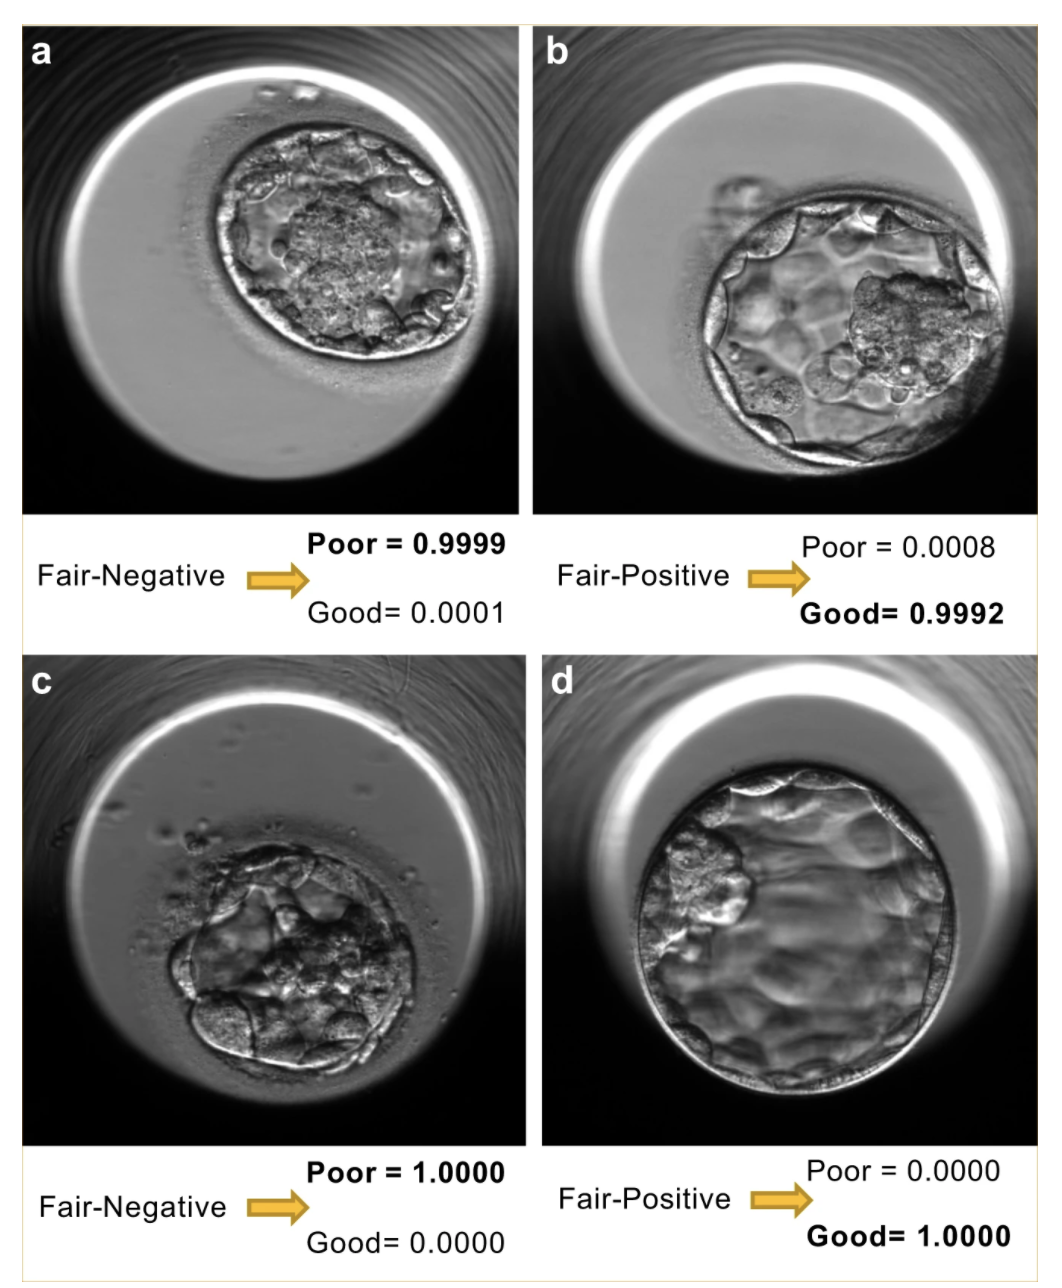

**Fig. 4**

STORK vs. embryologists classification: STORK classifies the fair-quality images into existing good-quality and poor-quality classes. For example, panels “a” and “b” are labeled 3A-B (fair-quality) according to the Veeck and Zaninovic grading system, while STORK classified them as poor-quality and good-quality, respectively. Also, panels “c” and “d” are both labeled 3BB (fair-quality). However, the algorithm correctly classified panel “c” as poor-quality and panel “d” as good-quality. As the figure shows, the outcome in the embryos in “b” and “d” is positive live birth, whereas it is negative live birth in “a” and “c”

ＳＴＯＲＫ vs 胚培養士の分類：STORKでは、公正品質の画像を既存の品質の良いクラスと悪いクラスに分類しています。例えば、パネル "a "と "b "は、Veeck and Zaninovicのグレーディングシステムで3A-B（フェアクオリティー）と表示され、STORKでは、それぞれ "貧質 "と "良質 "に分類されています。また、パネル "c "と "d "は共に3BB（フェアクオリティ）と表示されています。しかし、アルゴリズムは、パネル「c」を低品質、パネル「d」を高品質に正しく分類しました。図に示すように、"b "と "d "の胚の結果は、"a "と "c "の胚は陰性であるのに対し、"b "と "d "の胚は陽性である。

---

#### 《補足》

**胚の評価方法について**

胚盤胞の内部細胞塊(ICM)と栄養外胚葉(TE)をそれぞれA～Cの3段階の評価を行います。
例えば、
4ABという評価は、拡張胚盤胞で、内部細胞塊の評価がA、栄養外胚葉の評価がB、
3CBという評価は、完全胚盤胞で、内部細胞会の評価がC、栄養外肺葉の評価がB、
ということを表しています。

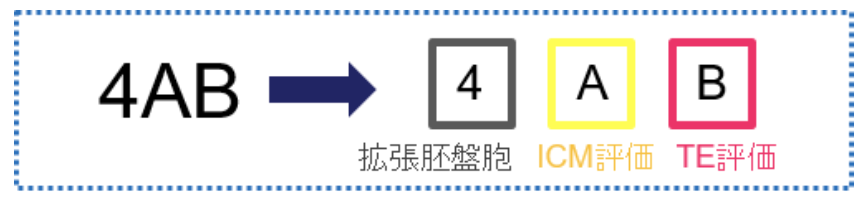

#### STORK is robust when applied to datasets from other clinics

To evaluate STORK’s robustness, we tested its performance by using additional datasets of embryo images obtained from two other IVF centers, Universidad de Valencia and IRDB-IC, comprising 127 (74 good-quality, 53 poor-quality) and 87 (61 good-quality, 26 poor-quality) embryos, respectively (Supplementary Table 2). 
Our experimental results (See Fig. 3a) demonstrate that although the scoring systems used for these centers are different from the system used to train our model, STORK can successfully identify and register score variations and robustly discriminate between them, with an AUC of 0.90 and 0.76 for the IRDB-IC and Universidad de Valencia and (Fig. 3a), respectively. 
Lower concordance of the classification results (by STORK) for the Universidad de Valencia dataset could be related to different grading systems used by that clinic.
The images of Universidad de Valencia dataset are labeled using Asebir26 while IRDB-IC is labeled using the Gardner system.
The Veeck and Zaninovic grading system is a slightly modified version of the Gardner system(Supplementary Table 4).

STORKのロバスト性を評価するために、他の2つの体外受精センター（Universidad de Valencia、IRDB-IC）で得られた127個（良質74個、不良53個）と87個（良質61個、不良26個）の胚の画像データを追加して、STORKの性能を検証しました（補足表2）。
実験結果（図3a参照）では、これらのセンターで使用されているスコアリングシステムは、我々のモデルの訓練に使用されているシステムとは異なるものの、STORKは、IRDB-ICではAUCが0.90、バレンシア大学ではAUCが0.76と、スコアのばらつきを識別して登録し、それらをロバストに識別することができることを示しています（図3a）。
バレンシア大学のデータセットの分類結果（STORKによる）の一致度が低いのは、その診療所で使用されているグレーディングシステムが異なることが関係している可能性があります。
バレンシア大学データセットの画像はAsebir26を用いてラベリングされており、IRDB-ICはGardnerシステムを用いてラベリングされている。
また、Veeck and ZaninovicのグレーディングシステムはGardnerシステムを少し改良したものである(補足表4)。

#### STORK outperforms individual embryologists for embryo selection

It is well known that embryo scoring frequently varies among embryologists, mainly due to the subjectivity of the scoring process and different interpretations of embryo quality. We, therefore, sought to create a small but robust benchmark embryo dataset that would represent the consensus of several embryol- ogists. We asked five embryologists from three different clinics to provide scores for each of 394 embryos generated in different labs (Supplementary Table 6). Note that these images were not used in the training phase of our algorithm. The embryo images were scored using the Gardner scoring system and then mapped onto our simplified three groups (good-quality, fair-quality, and poor-quality; see Supplementary Table 4 for the mapping method).

STORKは、胚の選択において個々の胚学者を凌駕しています
胚のスコアリングが胚学者によって異なることはよく知られていますが、これは主にスコアリングプロセスの主観性や胚の質の解釈の違いによるものです。そこで私たちは、数人の胚培養士のコンセンサスを代表する、小規模ではありますが堅牢なベンチマーク胚データセットを作成することを目指しました。私たちは、3つの異なるクリニックから5人の胚培養士に、異なるラボで作成された394個の胚のそれぞれのスコアを提供するように依頼しました（補足表6）。これらの画像は、我々のアルゴリズムのトレーニング段階では使用されていないことに注意してください。胚の画像は、ガードナースコアリングシステムを使用してスコアリングされ、その後、我々の単純化された3つのグループ（良好な品質、公正な品質、および貧しい品質;マッピング方法については、補足表4を参照）にマッピングされました。



As expected, we found a low level of agreement among the embryologists (Supplementary Fig. 1b), with only 89 embryos out of the 394 classified as the same quality by all five embryologists (Supplementary Fig. 1a). Therefore, to create a larger and more accurate gold standard dataset, we used an embryologist majority voting procedure (i.e., the quality of each image was determined by the score given by at least three out of the five embryologists) to classify 239 images (32 good-quality and 207 poor-quality).

予想通り、5人の胚専門家全員が同じ品質に分類した胚は394個のうち89個しかなく、胚専門家の間での一致度は低いことがわかりました（補足図1b）。
そこで、より大規模で精度の高いゴールドスタンダードデータセットを作成するために、胚培養士による多数決投票（5人の胚培養士のうち少なくとも3人の胚培養士が与えたスコアによって各画像の品質が決定される）を用いて、239枚の画像（32枚が良品、207枚が不良品）を分類しました。



When we applied STORK to these 239 images, we found that it predicted the embryologist majority vote with precision of 95.7% (Cohen’s kappa = 0.63).
In comparison, STORK agreed with each individual embryologist as follows: 0.69, 0.54, 0.25, 0.62, and 0.54 Cohen’s kappa score. 
These results indicate that STORK may outperform individual embryologists when assessing embryo  image quality (Fig. 5).

この239枚の画像にSTORKを適用したところ、95.7%の精度で胚培養士の多数決を予測することがわかりました（Cohen’s kappa=0.63）。
これに対してSTORKは、各胚培養士と一致したのは以下のようになりました。0.69、0.54、0.25、0.62、Cohen’s kappa score 0.54。
これらの結果から、STORKは胚の画像品質を評価する際に、個々の胚培養士よりも優れている可能性があることがわかります（図5）。

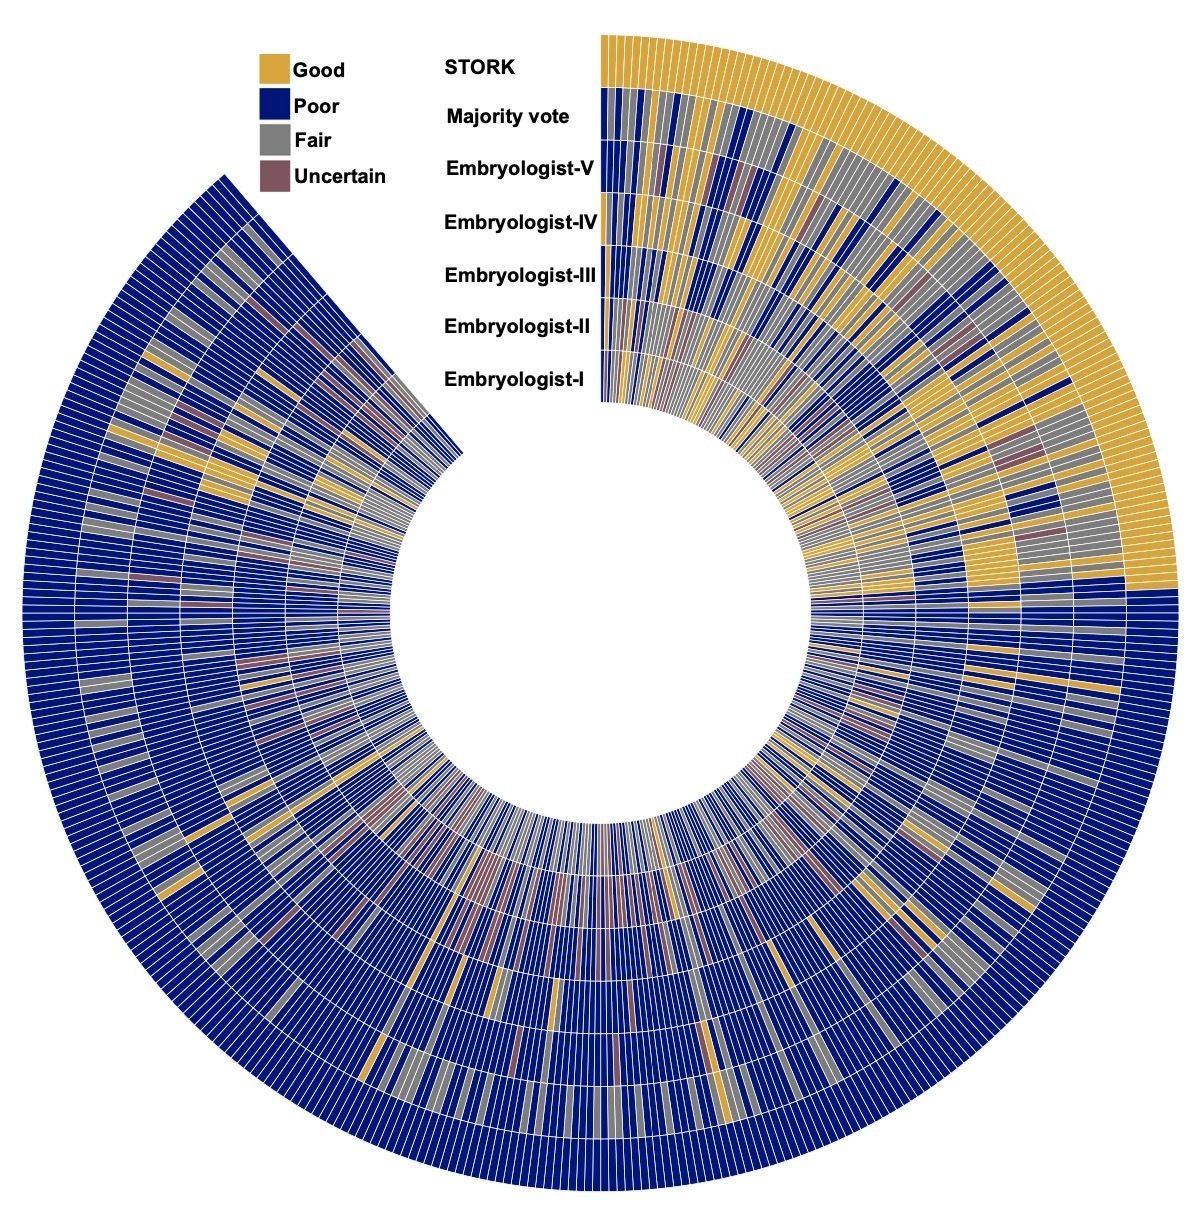

**Fig.5**

Assessment comparison of STORK with five embryologists: This circular heatmap demonstrates the prediction of STORK and five embryologists in the labeling of the same images from 394 embryos. STORK outputs good and poor grades. The heatmap compares STORK’s result with the majority vote results from all of the embryologists for 239 embryos in which the majority (i.e., at least three out of five embryologists) gives good or poor. The embryologists assess the embryos quality using Gardner grading system. Then, they convert the grades to the three different quality scores as good-quality (orange), fair-quality (gray), and poor-quality (navy) based on the pregnancy rate. Also, for a few embryos, the embryologist uses “?” signs (e.g. 3A?), which refer to the low certainty (red) as they are not sure about the exact label. The heatmap illustrates the result of STORK, Majority vote, Embryologist-V, Embryologist-IV, Embryologist-III, Embryologist-II, and Embryologist-I from the outer circle to the inner ones. Orange: embryos with good-quality; navy: embryos with poor-quality; gray: embryos with fair-quality; red: embryos that are not labeled due to uncertainty

5人の胚学者とSTORKの評価比較：この円形のヒートマップは、394個の胚の同じ画像をラベリングする際のSTORKと5人の胚培養士の予測を示しています。STORKの成績は良いものと悪いものがあります。ヒートマップは、STORKの結果と、多数派（5人の胚培養士のうち少なくとも3人）が「良い」または「悪い」と評価した239個の胚について、すべての胚培養士による多数決の結果を比較しています。胚培養士は、ガードナー評価システムを用いて胚の品質を評価します。
その後、彼らは妊娠率に基づいて、良い品質（オレンジ色）、公正品質（グレー）、および貧しい品質（ネイビー）として3つの異なる品質のスコアにグレードを変換します。また、いくつかの胚については、胚学者は正確なラベルについて確信が持てないため、確実性が低い（赤）ことを「？」signs (e.g. 3A?)で示す。ヒートマップは、STORK、Majority vote、Embryologist-V、Embryologist-IV、Embryologist-III、Embryologist-II、Embryologist-Iの結果を、外側の円から内側の円に向かって示しています。


オレンジ：品質の良い胚。


ネイビー：品質の悪い胚。


グレー：品質の良い胚。


赤：不確かなため表示されていない胚

---

#### A decision tree predicts likelihood of successful pregnancy based on embryo quality and clinical parameters

#### 胚の質と臨床パラメータに基づいて妊娠成功の可能性を予測する決定木


It is known that other factors, besides embryo quality, such as patient age, the patient’s genetic background, clinical diagnosis, and treatment-related characteristics, can affect pregnancy outcome.
As embryo quality is one of the most important of these factors, the ultimate aim of any embryo assessment approach is to identify embryos that have the highest implantation potential resulting in live birth.
However, embryo quality alone is not enough to accurately determine the pregnancy probability (see Supplementary Method 1, Supplementary Method 2 and Supplementary Fig. 2).

胚の質以外にも、患者の年齢、患者の遺伝的背景、臨床診断、治療に関連した特徴など、胚の質以外の要因が妊娠の転帰に影響を与えることが知られています。
胚の質はこれらの要因の中で最も重要なものの一つであるため、胚評価アプローチの最終的な目的は、生きた出産につながる着床の可能性が最も高い胚を特定することです。
しかしながら、胚の質だけでは、妊娠確率を正確に決定するには十分ではありません（補足方法１、補足方法２及び補足図２を参照）。



Therefore, in this section we present an alternative method for predicting successful pregnancy probability based on a state-of-the-art decision tree method that integrates clinical information and embryo quality. We wondered if we could assess the successful pregnancy rate by using a combination of embryo quality and patient age, as age is one of the most important clinical variables. For this purpose, we used a hierarchical decision tree method known as chi-squared automatic interaction detection (CHAID) algorithm.<span style="color : blue; ">**[33]**</span>

そこで本節では、臨床情報と胚の質を統合した最先端の決定木法に基づいて妊娠成功確率を予測するための代替方法を提示する。我々は、年齢が最も重要な臨床変数の一つであることから、胚の質と患者の年齢を組み合わせて妊娠成功率を評価することができないかと考えた。この目的のために、カイ二乗自動相互作用検出（CHAID）アルゴリズムとして知られている階層的決定木法を用いた。

#### We designed a CHAID

We designed a CHAID decision tree using 2182 embryos from the WCM-NY database (Supplementary Table 6) with available clinical information and pregnancy outcome results (Fig. 6). We then investigated the interaction between patient age (consisting of seven classes: ≤30, 31–32, 33–34, 35–36, 37–38, 39–40, and ≥41) (Supplementary Fig. 3a) and embryo quality (consisting of two classes: good-quality and poor-quality). The fully de-identified data consists of a very diverse population of patients (Supplementary Fig. 3b). The effect on live birth outcome is demonstrated in (Supplementary Fig. 3c). The CHAID algorithm can project interactions between variables and non-linear effects, which are generally missed by traditional statistical techniques. CHAID builds a tree to determine how variables can explain an outcome in a statistically meaningful way. CHAID uses chisquared statistics for identification of optimal multi-way splits, and identifies a set of characteristics (e.g., patient age and embryo quality) that best differentiates individuals based on a categorical outcome (here, live birth) and creates exhaustive and mutually exclusive subgroups of individuals. It chooses the best partition on the basis of statistical significance and uses Bonferroni-adjusted p- values to determine significance with a predetermined minimum size of end nodes.  We used a 1% Bonferroni-adjusted p-value, a maximum depth of the tree (n = 5), and a minimum size of end nodes (n = 20) as the stopping criteria. The application of a tree- based algorithm on the embryo data would help to more precisely define the effect of patient age and embryo quality (good-quality or poor-quality) on live birth outcome, and to better understand any interactions between these two clinical variables (patient age and embryo quality).

利用可能な臨床情報と妊娠の結果を持つWCM-NYデータベース（補足表6）の2182個の胚を用いてCHAID決定木を設計した（図6）。次に、患者の年齢（30歳未満、31～32歳未満、33～34歳未満、35～36歳未満、37～38歳未満、39～40歳未満、≧41歳未満の7つのクラスからなる）（補足図3a）と胚の質(質の良いクラスと悪いクラスの2つのクラスからなる）との相互作用を調べた。完全な非同定データは、非常に多様な患者さんの集団から構成されています。補足図３Ｂ）。出生成績への影響は（補足図３ｃ）で実証されている。CHAIDアルゴリズムは、従来の統計手法では一般的に見過ごされていた変数間の相互作用や非線形効果を投影することができます。
CHAIDは、変数がどのように統計的に意味のある方法で結果を説明できるかを判断するために、ツリーを構築します。CHAIDは、最適な多方向分割を識別するためにチス二乗統計を使用し、カテゴリカルな結果（ここでは、ライブバース）に基づいて個人を最もよく区別する特徴のセット（例えば、患者の年齢や胚の質）を識別し、個人の網羅的で相互に排他的なサブグループを作成します。これは、統計的有意性に基づいて最良のパーティションを選択し、ボンフェローニ調整されたp値を使用して、エンドノードの事前に設定された最小サイズで有意性を決定します。1%のボンフェローニ調整p値、木の最大深度(n = 5)、最小の末端節点サイズ(n = 20)を停止基準として使用した。胚データにツリーベースのアルゴリズムを適用することで、患者の年齢と胚の質（質の良し悪し）が生きた状態での出産に及ぼす影響をより正確に定義し、これら2つの臨床変数（患者の年齢と胚の質）の間の相互作用をよりよく理解するのに役立つであろう。



Note that while several other classification algorithms could have been employed for the prediction, CHAID enabled a userfriendly visualization of the resulting decision tree.

他にもいくつかの分類アルゴリズムが予測に採用されている中で、CHAIDは、結果として得られた決定木をユーザーフレンドリーに可視化することを可能にしました。



As Fig. 6 shows, patients were automatically classified into three age groups: (i) ≤36, (ii) 37 and 38, and (iii) ≥39 years old due to age data distribution.
For each age group, embryos were classified in good- and poor-quality groups (Supplementary Fig. 3c).

図６に示すように、患者を自動的に３つの年齢群に分類した。年齢データの分布から、①36歳以下、②37歳と38歳、③39歳以上の3つの年齢群に自動的に分類された。
各年齢群ごとに、胚を良品群と不良品群に分類した（補足図３ｃ）。



The results confirm the association between probability of successful pregnancy and patient age. The live birth probability for patients with good-quality embryos is significantly (1% Bonferroni-adjusted p-value) higher than that for patients with poor-quality embryos across different ages. Figure 6 indicates that patients ≤36 years old have a higher successful pregnancy rate compared to patients in the other two age groups. The CHAID decision tree analysis also indicates that the chance of favorable outcome using IVF varies from 13.8% (e.g., when the embryo is of poor-quality as assessed by STORK and the patient is ≥41 years old) to 66.3% (e.g., when the embryo is of good-quality and the patient is <37 years old) (Fig. 6).

この結果は、妊娠に成功する確率と患者の年齢との関連性を確認するものである。質の良い胚を持つ患者の出生確率は、質の悪い胚を持つ患者の出生確率よりも、年齢の異なる患者の出生確率の方が有意に高い（1％のボンフェローニ調整p値）。図6は、36歳以下の患者は、他の2つの年齢層の患者に比べて妊娠成功率が高いことを示しています。CHAID決定木分析では、体外受精で良好な結果が得られる確率は、13.8％（STORKで評価した胚の質が悪く、患者が41歳以上の場合など）から66.3％（胚の質が良く、患者が37歳未満の場合など）まで様々であることが示されています（図6）。

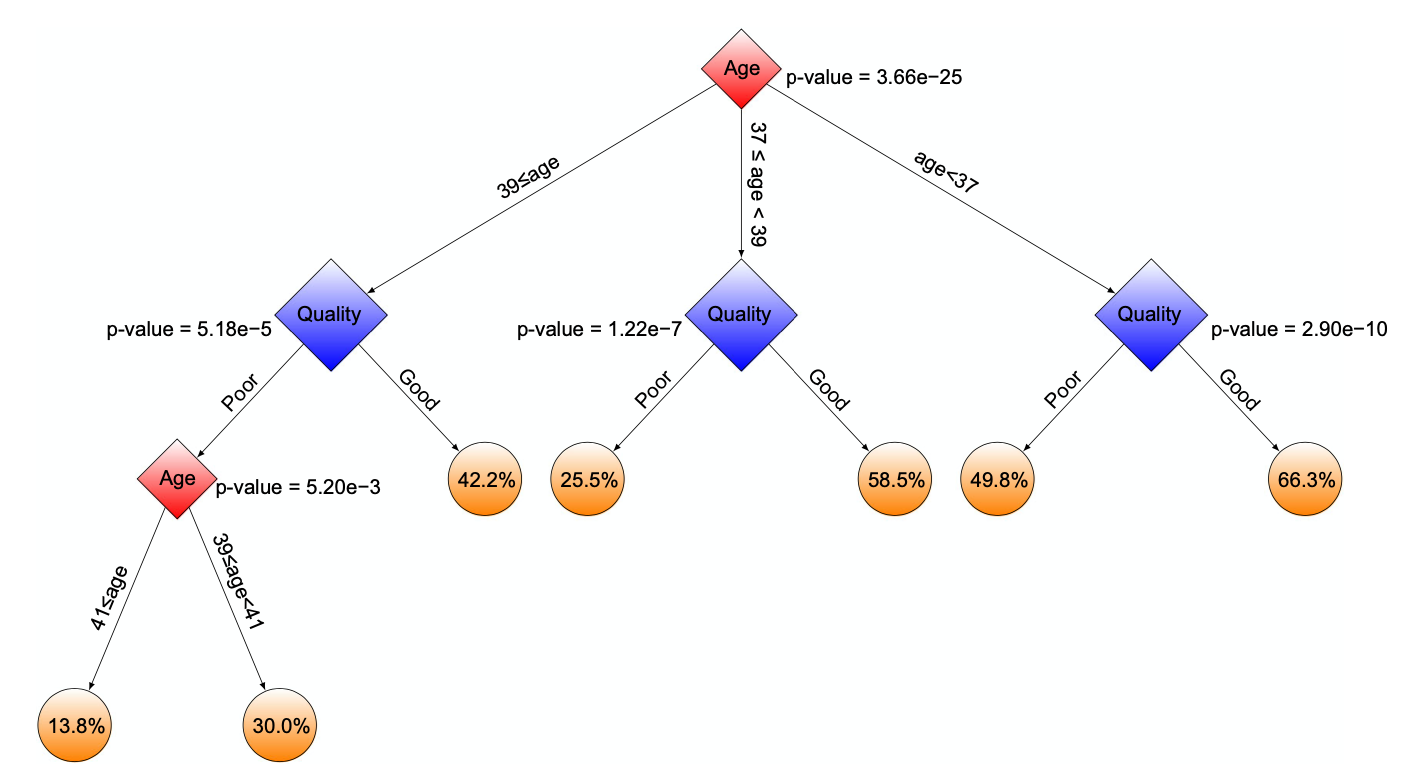

**Fig.6**

Interactions between age and embryo quality: The decision tree shows the interactions between IVF patient age and embryo quality using CHAID

年齢と胚の質の間の相互作用 ：決定木は、CHAIDを用いた体外受精患者の年齢と胚の質の間の相互作用を示しています。

---

#### Probability analysis optimizes embryo selection and maximizes likelihood of single pregnancy

#### 確率解析により胚選択を最適化し、単一妊娠の可能性を最大化する

It is a common practice in IVF clinics to select and transfer more than one embryo in order to increase the chance of a successful pregnancy.
As the success rate of individual embryos are typically <50% and transferring two or more embryos can increase the success probability.
However, when the number of transferred embryos increases, the chance of multiple pregnancies (twins or even triplets) and associated complications also increase.
For example, let’s simply assume we transfer three embryos each with an independent success probability of 1/4.
The chance of a pregnancy can be, thus, calculated as p = 1−(3/4)3 ≈ 0.58.
However, in this scenario, the chance of twin and triplets pregnancy would be 3 × (1/4)2(3/4) ≈ 0.14 and (1/4)3 ≈ 0.02, respectively.
The chance of a single pregnancy would be 3 × (1/4)(3/4)2 ≈ 0.42.

体外受精のクリニックでは、妊娠に成功する可能性を高めるために、複数の胚を選択して移植するのが一般的です。個々の胚の成功率は通常50％未満であり、2つ以上の胚を移植することで成功確率を高めることができます。しかし、移植する胚の数が増えると、多胎妊娠（双子や三つ子）やそれに伴う合併症の可能性も高くなります。例えば、3つの胚をそれぞれ1/4の独立した成功確率で移植したと仮定します。妊娠の可能性は、このように、P = 1-(3/4)3≈0.58として計算することができます。しかし、このシナリオでは、双子と三つ子の妊娠の確率は、それぞれ3×(1/4)2(3/4)≒0.14と(1/4)3≒0.02になります。単胎妊娠の確率は、3×(1/4)(3/4)2≒0.42となります。



Given a list of potential embryos for transfer and their predicted success rate using our decision tree analysis, we can calculate the probability of no pregnancy, single pregnancy, and multiple pregnancies, for any selection of embryos from the list.
In general, if k embryos are transferred with indicated success probabilities of p1, ..., pk (where pi shows the success probability of embryo i, for any index i between 1 and k) then the chance of a single pregnancy can be calculated as P = ∑i pi∏j≠i(1−pj).
Given the success rate of any individual embryo transfer, we showed how to calculate the probability of a single successful pregnancy when k embryos (k > 1) are transferred.
This will help embryologists to select those embryos (for example two or three), which maximize the chance of a single pregnancy when transferred together.

移植の可能性のある胚のリストと、当社の決定木分析を使用して予測される成功率が与えられると、リストから胚を選択した場合、妊娠しない確率、単発妊娠、多胎妊娠の確率を計算することができます。一般的に、k個の胚がp1, ...., pk（ここでpiは、1からkの間の任意の指標iについて、胚iの成功確率を示す）と示された成功確率で移植された場合、単発妊娠の確率は、P = ∑i∏pij≠i(1-pj)として計算することができます。個々の胚移植の成功率を考えると、k個（k > 1）の胚が移植された場合に、単一の妊娠に成功する確率を計算する方法を示しました。これは、胚培養士が、一緒に移植されたときに単一の妊娠の可能性が最大になる胚（例えば、2つまたは3つ）を選択するのに役立つでしょう。

## DISCUSSION

Studies on human embryo evaluation are still very limited and mostly based on morphological features.
They often involve low numbers of embryos from single centers, and they lack validations in independent cohorts.
Furthermore, publications to date have relied on single static images.
However, time-lapse images have the advantage of being consistent in terms of size, lighting, contrast, quality, and in terms of capturing the timing of embryo development, which is particularly important when quantifying blastocyst expansion.
Currently, no robust and fully automatic method exists to analyze human embryo data by TLI.

ヒト胚の評価に関する研究はまだ非常に限られており、ほとんどが形態学的特徴に基づいています。これらの研究では、多くの場合、単一のセンターからの胚の数が少なく、独立したコホートでの検証が行われていません。さらに、これまでの出版物は、単一の静止画像に依存しています。しかし、タイムラプス画像は、サイズ、照明、コントラスト、品質、および胚の発達のタイミングをキャプチャするという点で一貫性があるという利点があり、これは胚盤胞の膨張を定量化するときに特に重要です。現在のところ、TLI によるヒト胚のデータを解析するためのロバストで完全自動な方法は存在しません。



Recently, there have been several studies utilizing classical machine learning approaches, such as support vector machine (SVM) and RF, and deep learning methods, such as CNN-basic, for outcome prediction or grade classification.
To date, several AI methods have been used to assess blastocysts. 
Image segmentation and advanced image analysis techniques using neural networks with textured descriptors, level set, phase congruency, and fitting of ellipse methods have been demonstrated in mouse, bovine, and human blastocysts.

最近では、サポートベクターマシン（SVM）やRFなどの古典的な機械学習手法や、CNN-basicなどの深層学習手法を結果予測や等級分類に利用した研究がいくつか行われています。現在までに、いくつかのAI手法が胚盤胞の評価に使用されています。マウス、ウシ、ヒトの胚盤胞において、テクスチャ付き記述子、レベルセット、位相整合性、楕円法のフィッティングなどのニューラルネットワークを用いた画像のセグメンテーションや高度な画像解析技術が実証されている。



<span style="color : red; ">More recently, Segal et al. have developed a random forest classifier-based tool using 2744 embryos to predict which patients should have extended culture with an accuracy of 76.4%.
Also, Matsumoto et al. used time-lapse monitoring of 118 human embryos to determine good-quality embryos using deep learning- based method, which is based on the Keras neural network library.
They achieved 70 and 80% accuracy for the validation dataset through two different cell stages that are significantly lower than the performance obtained from our framework.
Besides, the advantage of our method is that instead of only focusing on the predetermined, segmented features that embryologists are trained to analyze, the entire image of the embryo is assessed, allowing for quantification of all the available data.</span> Convolution, therefore, allows the AI to identify patterns in morphological features that we do not know how to assess.

<span style="color : red; ">最近では、Segalらは、2744個の胚を使用して、どの患者が培養を延長すべきかを76.4％の精度で予測するランダムフォレスト分類器ベースのツールを開発しました。また、松本らは、118個のヒト胚のタイムラプスモニタリングを用いて、Kerasニューラルネットワークライブラリをベースとしたディープラーニングベースの手法を用いて、良質な胚を判定している。彼らは、2つの異なる細胞ステージを通して、検証データセットの精度70と80%を達成しましたが、これは我々のフレームワークで得られた性能よりも著しく低いものでした。さらに、私たちの方法の利点は、胚学者が解析するために訓練されたあらかじめ決められたセグメント化された特徴だけに焦点を当てるのではなく、胚の画像全体を評価し、利用可能なすべてのデータの定量化を可能にしていることです。</span>
したがって、コンボリューションによって、我々が評価する方法がわからない形態学的特徴のパターンをAIが識別することができるようになります。



We have demonstrated that deep learning approaches can provide accurate quality assessments in various clinical conditions.
The STORK framework presented here provides a method that can be easily implemented for a wide range of applications, including embryo grading.
Our method yields a cutting-edge sensitivity when performing the challenging task of assessing embryo quality using multi-focal embryo images.
Notably, our STORK framework is fully automated and does not require any manual augmenta- tions or preprocessing on the input images.
n fact, it provides embryologists a straightforward platform to use without requiring sophisticated computational knowledge.
Furthermore, we designed a decision tree based on the CHAID algorithm to investigate the interaction between embryo quality and patient characteristics (i.e., patient age) in a diverse population, and their effect on the likelihood of live birth.

ディープラーニングのアプローチにより、様々な臨床状態における正確な品質評価が可能であることを実証しました。ここで紹介するSTORKフレームワークは、胚のグレーディングを含む幅広いアプリケーションに容易に実装できる手法を提供します。我々の手法は、多焦点胚画像を用いて胚の品質を評価するという困難なタスクを実行する際に、最先端の感度を得ることができます。
特筆すべきは、我々のSTORKフレームワークは完全に自動化されており、入力画像に手動での補正や前処理を必要としません。実際、高度な計算知識を必要とせず、胚培養士が使いやすいプラットフォームを提供します。さらに、我々はCHAIDアルゴリズムに基づいた決定木を設計し、多様な集団における胚の質と患者の特徴（すなわち、患者の年齢）との間の相互作用、および出生の可能性に対するそれらの影響を調査しました。



Finally, although STORK can run on traditional computer microprocessors (CPUs), abundant system memory and graphics processing units (GPUs) make the training process faster (at least one order of magnitude) as training requires loading a significant number of medical images for training and validation.

最後に、STORKは従来のコンピュータ・マイクロプロセッサ（CPU）上で実行できますが、豊富なシステムメモリとグラフィック・プロセッシング・ユニット（GPU）により、トレーニングと検証のためにかなりの数の医用画像をロードする必要があるため、トレーニングプロセスが高速化されます（少なくとも1桁）。



Nevertheless, our method still has limitations. For example, we explored the possibility of directly predicting the likelihood of pregnancy based on only embryo images that are labeled as “positive live birth” or “negative live birth” (Supplementary Method 2).
The result showed that the trained algorithm cannot identify positive live birth and negative live birth successfully using embryo morphology alone.

それにもかかわらず、我々の方法にはまだ限界があります。例えば、我々は、"生きた状態での出産 "または "死産 "としてラベル付けされた胚の画像のみに基づいて妊娠の可能性を直接予測する可能性を検討しました（補足方法2）。その結果、学習したアルゴリズムでは、胚の形態のみでは、両者をうまく識別できないことがわかりました。